In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import os
import pandas as pd
from termcolor import colored
import numpy as np
import matplotlib.pyplot as plt
from natsort import natsorted

In [3]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

In [4]:
results_folder = os.path.join(os.getcwd(), "random_exp")

In [5]:
if not os.path.isdir(results_folder):
    print(colored("Error, results_folder does not exist", 'red'))
else:
    print(colored("OK, "+results_folder+" exists", 'green'))

OK, /home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/random_exp exists


In [14]:
def print_dict(my_dict):
    for key,val in my_dict.items():
        print(key,val)

In [27]:
def print_nested_dict(my_dict):
    for key,val in my_dict.items():
        print(colored(key, 'blue'))
        for k,v in val.items():
            print(k,v, end="\n\n")

In [15]:
timeoutR=-1
timeoutB=-1
timeoutR_arr = np.array([])
timeoutB_arr = np.array([])

for timeout_folder in natsorted(os.listdir(os.path.join(results_folder))):
    # print(colored("\tTimeout folder:", 'blue'),timeout_folder)
    parameters = timeout_folder.split("_")

#   print("parameters[0]",parameters[0])

    for param in parameters:
        if param.startswith("timeoutR"):
            timeoutR = int(param.split("#")[-1]) * 10
            # print("\ttimeoutR:",timeoutR)
        elif  param.startswith("timeoutB"):
            timeoutB = int(param.split("#")[-1]) * 10
            # print("\ttimeoutB:",timeoutB)

    if timeoutR == -1 or timeoutB== -1:
        print(colored("\tWARNING: wrong timeout folder", 'green'))
        continue

    timeoutR_arr = np.append(timeoutR_arr, timeoutR)
    timeoutB_arr = np.append(timeoutB_arr, timeoutB)
  
#generate the empty nested dict
timeoutR_arr = np.unique(timeoutR_arr)
exp_dict = {}
for tr in timeoutR_arr:
    exp_dict[tr] = {}
    for tb in timeoutB_arr:
        exp_dict[tr][tb] = {}
        
print_dict(exp_dict)

150.0 {150.0: {}, 180.0: {}, 210.0: {}, 240.0: {}, 270.0: {}, 300.0: {}}
180.0 {150.0: {}, 180.0: {}, 210.0: {}, 240.0: {}, 270.0: {}, 300.0: {}}
210.0 {150.0: {}, 180.0: {}, 210.0: {}, 240.0: {}, 270.0: {}, 300.0: {}}
240.0 {150.0: {}, 180.0: {}, 210.0: {}, 240.0: {}, 270.0: {}, 300.0: {}}
270.0 {150.0: {}, 180.0: {}, 210.0: {}, 240.0: {}, 270.0: {}, 300.0: {}}
300.0 {150.0: {}, 180.0: {}, 210.0: {}, 240.0: {}, 270.0: {}, 300.0: {}}


In [17]:
timeoutR=-1
timeoutB=-1
for timeout_folder in natsorted(os.listdir(os.path.join(results_folder))):
    print(colored("\tTimeout folder:", 'blue'),timeout_folder)
    parameters = timeout_folder.split("_")

#   print("parameters[0]",parameters[0])

    for param in parameters:
        if param.startswith("timeoutR"):
            timeoutR = int(param.split("#")[-1]) * 10
            # print("\ttimeoutR:",timeoutR)
        elif  param.startswith("timeoutB"):
            timeoutB = int(param.split("#")[-1]) * 10
            # print("\ttimeoutB:",timeoutB)

    if timeoutR == -1 or timeoutB== -1:
        print(colored("\tWARNING: wrong timeout folder", 'green'))
        continue
        
    completed_areas = np.array([])
    for filename in os.listdir(os.path.join(results_folder, timeout_folder)):
        if filename.endswith("taskLOG_client.tsv"):
#                 print("\t\tFilename:",filename)
            if not os.path.getsize(os.path.join(results_folder, timeout_folder, filename)) > 0:
                print(colored("\tWARNING, empty file at:" + filename, 'red'))
                completed_areas = np.append(completed_areas, 0)
                continue

#                 print("\tPath:", os.path.join(results_folder, experiment, timeout_folder, filename))
            df = pd.read_csv(os.path.join(results_folder, timeout_folder, filename), sep="\t", header=None)
            completed_areas = np.append(completed_areas, df.shape[0])

    exp_dict[timeoutR][timeoutB] = completed_areas

	Timeout folder: random_2021-04-27_robots#24_timeoutR#15_timeoutB#15_1800seconds
	Timeout folder: random_2021-04-27_robots#24_timeoutR#15_timeoutB#18_1800seconds
	Timeout folder: random_2021-04-27_robots#24_timeoutR#15_timeoutB#21_1800seconds
	Timeout folder: random_2021-04-27_robots#24_timeoutR#15_timeoutB#24_1800seconds
	WARNING, empty file at:seed#43_completed_taskLOG_client.tsv
	Timeout folder: random_2021-04-27_robots#24_timeoutR#15_timeoutB#27_1800seconds
	WARNING, empty file at:seed#43_completed_taskLOG_client.tsv
	Timeout folder: random_2021-04-27_robots#24_timeoutR#15_timeoutB#30_1800seconds
	WARNING, empty file at:seed#43_completed_taskLOG_client.tsv
	Timeout folder: random_2021-04-27_robots#24_timeoutR#18_timeoutB#15_1800seconds
	Timeout folder: random_2021-04-27_robots#24_timeoutR#18_timeoutB#18_1800seconds
	Timeout folder: random_2021-04-27_robots#24_timeoutR#18_timeoutB#21_1800seconds
	WARNING, empty file at:seed#43_completed_taskLOG_client.tsv
	Timeout folder: random_202

In [28]:
print_nested_dict(exp_dict)

150.0
150.0 [ 6. 10.  7. 20.  8. 28. 10. 11. 15. 26. 27. 25.  9. 35.  6. 12. 33. 19.
  8.  8. 11. 19.  3. 18. 13. 15. 27. 11. 14. 18. 14. 23. 21. 19. 18. 24.
 32.  6.  7. 21. 16. 13. 18. 19. 20. 10. 19. 15. 19. 26. 22. 12. 22. 14.
 23.  6. 32. 16. 12. 32. 17. 35. 23. 19. 14. 13. 11. 11. 25. 15. 20. 16.
 18. 18. 24. 24. 14. 21. 25. 35.  9. 17.  5. 19. 24. 15. 18. 13.  5.  7.
  8.  7. 14.  6. 21. 21. 18. 25.  9. 21.]

180.0 [ 9. 18.  4. 20.  7. 27. 12.  9. 14. 17. 32. 17. 11. 38.  5. 11. 33. 21.
 11. 11. 10. 19.  1. 20. 19. 20. 24. 10. 17. 22. 14. 20. 20. 19. 15. 26.
 30.  8. 16. 19. 20. 17. 12. 18. 19.  9. 17. 17. 19. 32. 24. 16. 23. 17.
 22. 10. 17. 14. 13. 32. 23. 34. 32. 17. 18. 22. 10. 14. 18. 12. 15. 16.
 27. 19. 22. 20. 13. 14. 19. 30. 19. 15.  7. 19. 27. 19. 16. 15. 11.  4.
 12. 10. 15.  7. 16. 17. 10. 22. 10. 23.]

210.0 [ 9. 10.  7. 18.  6. 21.  8.  7. 16. 22. 27. 25.  8. 32.  6. 10. 45. 25.
  5.  4. 10. 12.  3. 22. 18. 19. 28. 10. 19. 13. 16. 21. 13. 20. 13. 27.
 30.  5. 16. 1

In [44]:
exp_pd = pd.DataFrame.from_dict(exp_dict)

In [48]:
# exp_pd

In [50]:
exp_dict[150.0]

{150.0: array([ 6., 10.,  7., 20.,  8., 28., 10., 11., 15., 26., 27., 25.,  9.,
        35.,  6., 12., 33., 19.,  8.,  8., 11., 19.,  3., 18., 13., 15.,
        27., 11., 14., 18., 14., 23., 21., 19., 18., 24., 32.,  6.,  7.,
        21., 16., 13., 18., 19., 20., 10., 19., 15., 19., 26., 22., 12.,
        22., 14., 23.,  6., 32., 16., 12., 32., 17., 35., 23., 19., 14.,
        13., 11., 11., 25., 15., 20., 16., 18., 18., 24., 24., 14., 21.,
        25., 35.,  9., 17.,  5., 19., 24., 15., 18., 13.,  5.,  7.,  8.,
         7., 14.,  6., 21., 21., 18., 25.,  9., 21.]),
 180.0: array([ 9., 18.,  4., 20.,  7., 27., 12.,  9., 14., 17., 32., 17., 11.,
        38.,  5., 11., 33., 21., 11., 11., 10., 19.,  1., 20., 19., 20.,
        24., 10., 17., 22., 14., 20., 20., 19., 15., 26., 30.,  8., 16.,
        19., 20., 17., 12., 18., 19.,  9., 17., 17., 19., 32., 24., 16.,
        23., 17., 22., 10., 17., 14., 13., 32., 23., 34., 32., 17., 18.,
        22., 10., 14., 18., 12., 15., 16., 27., 19., 22

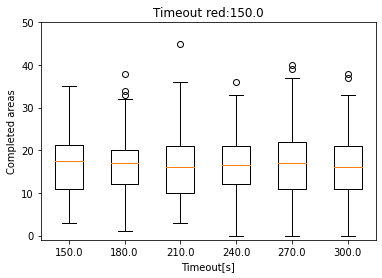

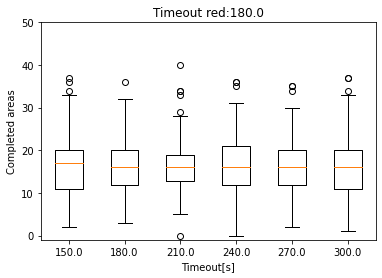

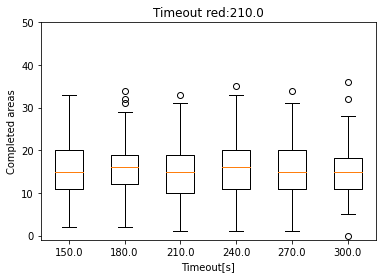

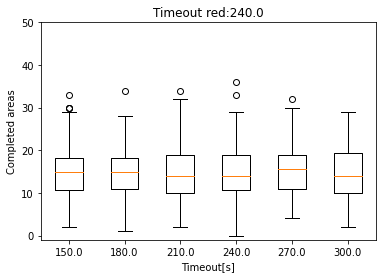

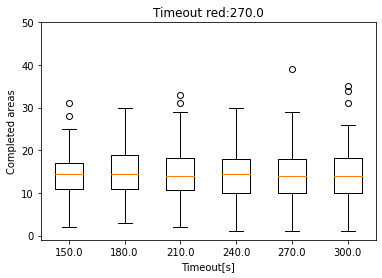

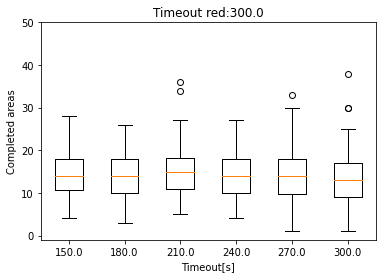

In [61]:
for key,val in exp_dict.items():
    fig, ax = plt.subplots()
    ax.boxplot(exp_dict[key].values())
    ax.set_xticklabels(exp_dict[key].keys())
    plt.ylim(-1, 50)
    ax.set_xlabel("Timeout[s]")
    ax.set_ylabel("Completed areas")
    plt.title('Timeout red:'+ str(key))

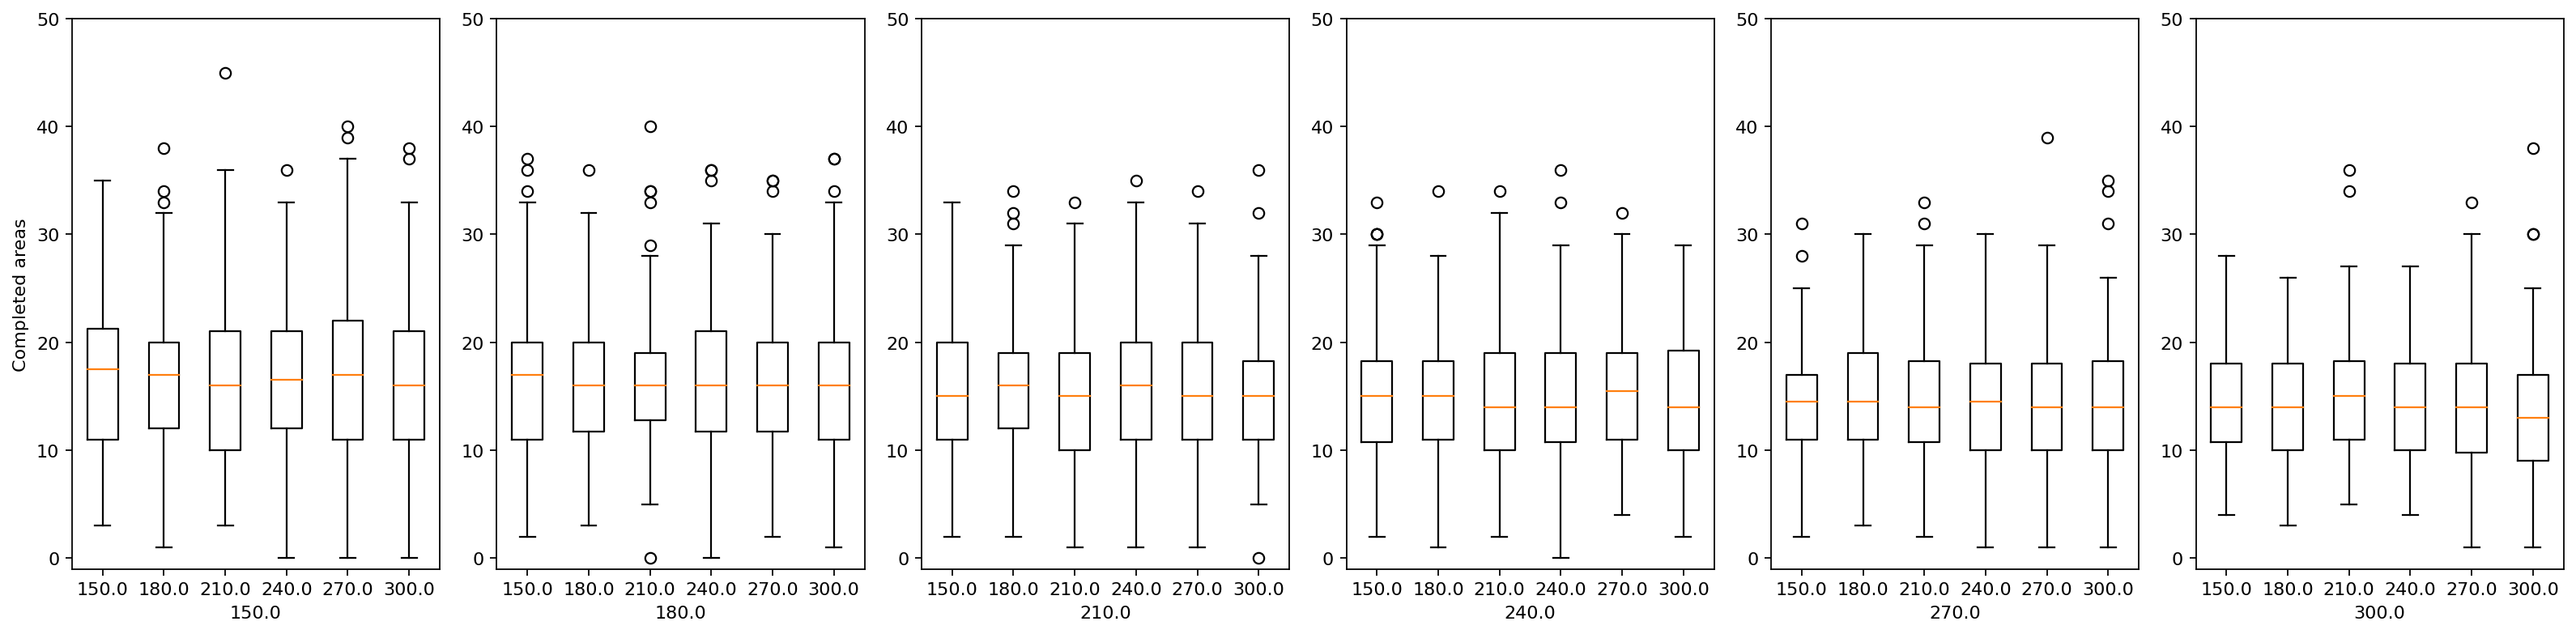

In [81]:
fig, ax = plt.subplots(1, len(exp_dict.items()),figsize=(20, 5), dpi=160)
# plt.title('Timeout red:'+ str(key))

for pos,(key,val) in enumerate (exp_dict.items()):
    ax[pos].boxplot(exp_dict[key].values())
    ax[pos].set_xticklabels(exp_dict[key].keys())
    ax[pos].set_ylim(-1, 50)
    ax[pos].set_xlabel(str(key))
    if(pos == 0):
        ax[pos].set_ylabel("Completed areas")
    

plt.tight_layout()
plt.savefig('boxcompare_red_and_blue.png')